## MCEq-1D

In [13]:
# https://mceq.readthedocs.io/en/latest/tutorial.html#tutorial

In [209]:
from MCEq.core import config, MCEqRun
import crflux.models as crf
import matplotlib.pyplot as plt
import numpy as np
from numba import njit

In [77]:
import mplcyberpunk as mcp
#plt.style.use("cyberpunk")
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
#plt.rcParams['axes.labelcolor'] = 'black'
#plt.rcParams['xtick.color'] = 'black'
#plt.rcParams['ytick.color'] = 'black'

#colors = [
    #'#08F7FE',  # teal/cyan
    #'#FE53BB',  # pink
    #'#F5D300',  # yellow
    #'#00ff41',  # matrix green
#]

In [213]:
#@njit()

def flux(theta, int_model = 'SIBYLL23C', primary_model = (crf.HillasGaisser2012, 'H3a') , numu_only = False):
    
    
    # Initalize MCEq by creating the user interface object MCEqRun
    mceq = MCEqRun(

        # Hadronic interaction model
        interaction_model= int_model,    # The default is high-energy

        # cosmic ray flux at the top of the atmosphere (primary flux)
        primary_model = primary_model,

        # zenith angle
        theta_deg = theta
    )
    
    mceq.set_theta_deg(theta*180/np.pi) # in degrees
    mceq.set_interaction_model(int_model)
    mceq.set_primary_model(primary_model[0], primary_model[1])
    
    # Solve the equation system
    mceq.solve()

    # Obtain the result
    # Multiply fluxes be E**mag to resolve the features of the steep spectrum
    mag = 0
    x = mceq.e_grid
    
    if numu_only == False:
        muon_flux = (mceq.get_solution('mu+', mag) +
                     mceq.get_solution('mu-', mag))
        numu_flux = (mceq.get_solution('numu', mag) +
                     mceq.get_solution('antinumu', mag))
        nue_flux = (mceq.get_solution('nue', mag) +
                    mceq.get_solution('antinue', mag))
        return muon_flux, numu_flux, nue_flux, x

    else:
        numu_flux = (mceq.get_solution('numu', mag) +
                     mceq.get_solution('antinumu', mag))
        
        
        return numu_flux, x

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): EPOSLHC
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): EPOSLHC
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


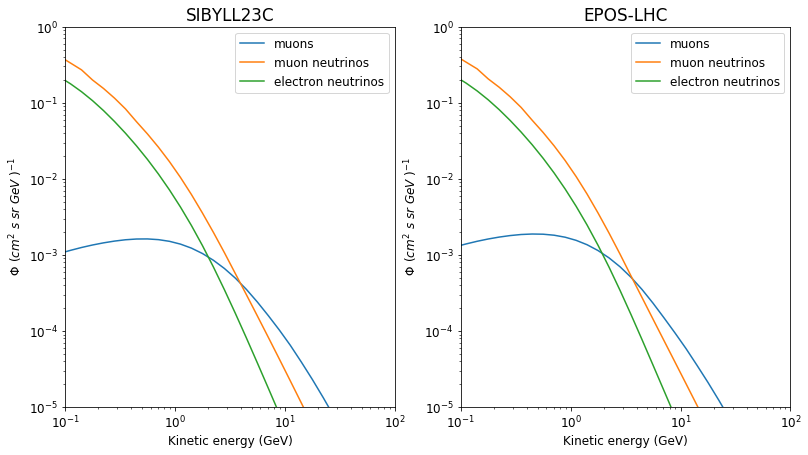

In [68]:
# Plots for 2 different interaction models
interaction_model = ['SIBYLL23C', 'EPOS-LHC']
r_theta = r'$\theta$'
r_numu = r'$\nu_{\mu}$'

fig, axs = plt.subplots(1,2, figsize=(13, 7), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(len(interaction_model)):
    muon_flux_0, numu_flux_0, nue_flux_0, x = flux(0, interaction_model[i])
    
    axs[i].loglog(x, muon_flux_0, label='muons')
    axs[i].loglog(x, numu_flux_0, label='muon neutrinos')
    axs[i].loglog(x, nue_flux_0, label='electron neutrinos')

    axs[i].set_xlim(10**(-1), 100)
    axs[i].set_xlabel('Kinetic energy (GeV)', fontsize=12)
    axs[i].set_ylim(10**(-5), 1)
    #(E/\text{GeV})^3\,\Phi$ (GeV cm$^{-2}$\,$s$^{-1}\,$sr$^{-1}$) (GeV)
    axs[i].set_ylabel(r' $\Phi$ ($cm^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)
    axs[i].set_title(interaction_model[i])
    axs[i].legend(fontsize=12)
    

In [69]:
#crf.test()

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL

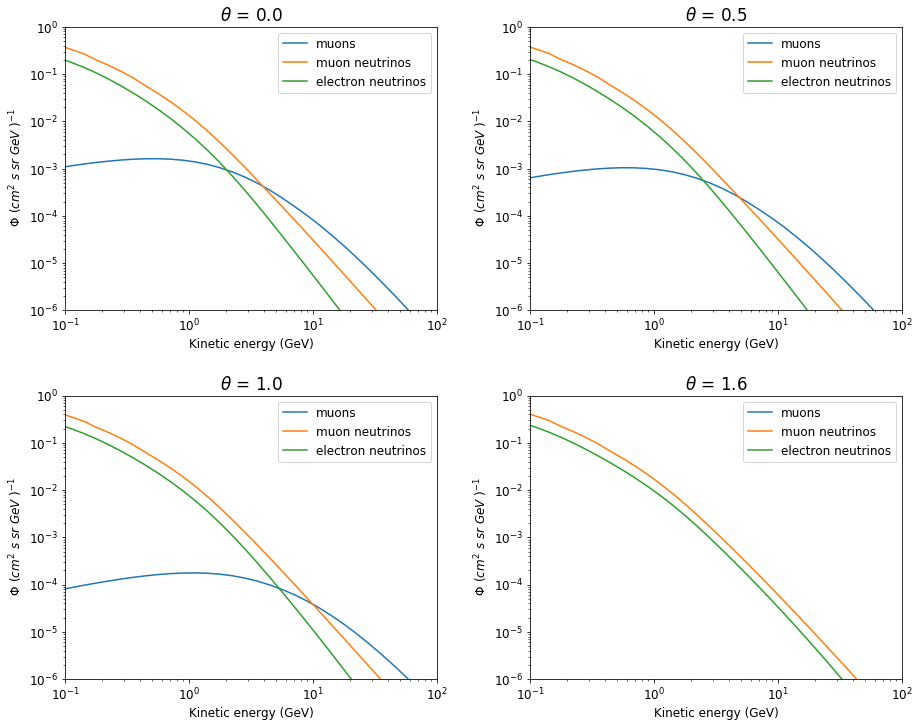

In [13]:
# Plots for 4 different theta
theta = np.linspace(0, np.pi/2, 4)

fig, axs = plt.subplots(2,2, figsize=(15, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace=.25)
axs = axs.ravel()

for i in range(len(theta)):
    muon_flux, numu_flux, nue_flux, x = flux(theta[i])
    
    axs[i].loglog(x, muon_flux, label='muons')
    axs[i].loglog(x, numu_flux, label='muon neutrinos')
    axs[i].loglog(x, nue_flux, label='electron neutrinos')
    axs[i].set_xlim(0.1, 100)
    axs[i].set_ylim(1e-6, 1.)

    axs[i].set_xlabel('Kinetic energy (GeV)', fontsize=12)
    #(E/\text{GeV})^3\,\Phi$ (GeV cm$^{-2}$\,$s$^{-1}\,$sr$^{-1}$) (GeV)
    axs[i].set_ylabel(r' $\Phi$ ($cm^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)
    axs[i].set_title(f'{r_theta} = {np.round(theta[i],1)}')
    axs[i].legend(fontsize=12)

#fig.savefig('3particles_4angles.png')

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL

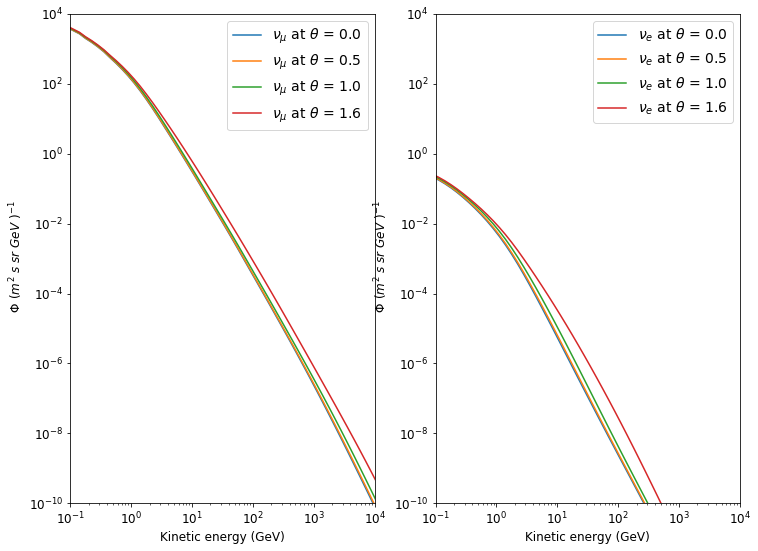

In [77]:
theta = np.linspace(0, np.pi/2, 4)

fig, axs = plt.subplots(1, 2, figsize=(12,9))
axs = axs.ravel()
r_nue = r'$\nu_e$'

for t in theta:
    muon_flux, numu_flux, nue_flux, x = flux(t)
    axs[0].loglog(x, numu_flux*10000, label=f'{r_numu} at {r_theta} = {np.round(t,1)}')  #m^2
    axs[1].loglog(x, nue_flux, label=f'{r_nue} at {r_theta} = {np.round(t,1)}')
    
for i in range(2):
    axs[i].set_xlabel('Kinetic energy (GeV)', fontsize=12)
    axs[i].set_ylabel(r' $\Phi$ ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)
    axs[i].set_xlim(0.1, 10**4)
    axs[i].set_ylim(10**(-10), 10**4)
    axs[i].legend()

#fig.savefig('numu_nue_4angles.png')

In [215]:
n_theta = 50
cos_theta_matrix = np.linspace(0, 1, n_theta)
cos_theta_matrix[0] += 10**(-7)
theta_matrix = np.arccos(cos_theta_matrix)

flux_SIBYLL23C_H3a = np.zeros((n_theta,121))

for t in range(len(theta_matrix)):
    print(t)
    numu_flux, x_matrix = flux(theta_matrix[t], numu_only = True)
    flux_SIBYLL23C_H3a[t] = numu_flux * 10_000                      # from cm^-2 to m^-2

0
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
1
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
2
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model

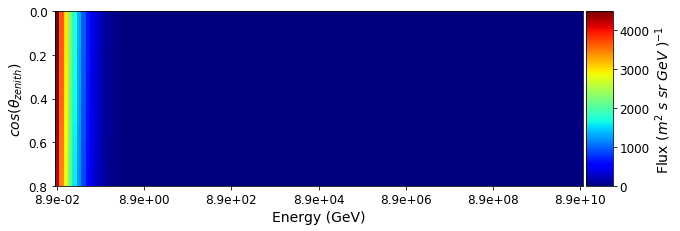

In [216]:
from matplotlib import cm, colors
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

energy_strings0 = [str("{:.1e}".format(x)) for x in x_matrix]
cos_theta_strings0 = [str(np.round(t, 1)) for t in cos_theta_matrix]
yticks0 = np.arange(0, 50, 10)
xticks0 = np.arange(0, 130, 20)
ylabels0 = [cos_theta_strings[i] for i in yticks0]
xlabels0 = [energy_strings0[i] for i in xticks0]

fig, ax = plt.subplots(figsize=(10,7))

im = ax.imshow(flux_SIBYLL23C_H3a, cmap='jet', norm = None)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$cos(\theta_{zenith})$')
ax.set_xticks(xticks0)
ax.set_xticklabels(xlabels0)
ax.set_yticks(yticks0)
ax.set_yticklabels(ylabels0)
cbar.set_label(r'Flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$')
#fig.savefig('MCEq1d...');

In [217]:
def find_nearest_above(my_array, target):
    
    diff = my_array - target
    mask = np.ma.less_equal(diff, 0)
    
    if np.all(mask):
        return None 
    masked_diff = np.ma.masked_array(diff, mask)
    
    return masked_diff.argmin()

In [276]:
# Limit to range 1-100 GeV

low_x = find_nearest_above(x_matrix, 1)
high_x =  find_nearest_above(x_matrix, 100)

energy_cropped = x_matrix[low_x : high_x]

In [270]:
# cos intervals for binning
cos_intervals = np.round(np.arange(0, 1, 0.1), 2)
cos_bins = np.digitize(cos_theta_matrix, cos_intervals)                                
    
# energy intervals
energy_min_cc = np.genfromtxt('numu_cc.csv', skip_header = 1, delimiter =',')[:,0]
energy_max_cc = np.genfromtxt('numu_cc.csv', skip_header = 1, delimiter =',')[:,1]
energy_bins_cc = np.digitize(energy_cropped, energy_min_cc)
energy_binwidths = energy_max_cc - energy_min_cc

In [271]:
xticks = np.arange(-0.5, 10.5, 1)
energy_ticklabels = np.append(energy_min_cc, energy_max_cc[-1])
energy_strings = [f'{energy_ticklabels[i]}' for i in range(len(xticks))]

cos_values = np.round(np.arange(1, -1.1, -0.1), 2)
yticks = np.arange(-0.5, 20, 1)
ylabels = [f'{cos_values[i]}' for i in range(len(yticks))]

In [290]:
def bin_matrix(matrix, divide = False, make_flux_plot = False, savefig = None):
    
    # Plot in range 1-100 GeV
    matrix_cropped = matrix[:, low_x : high_x]
    
    #Binning
    
    matrix_cropped_ybinned = np.zeros((len(cos_intervals) , len(matrix_cropped[0])))

    # averaging rows in same interval
    for i in range(1, len(cos_intervals)+1):
        rows = np.where(cos_bins == i)[0]
        averaged_row = np.sum(matrix_cropped[rows[0] : rows[-1], : ], axis = 0) / len(rows)
        matrix_cropped_ybinned[ i-1 , : ] = averaged_row
    
    binned_cropped_matrix = np.zeros((len(cos_intervals), len(energy_min_cc)))

    # averaging columns in same interval
    for i in range(1, len(energy_min_cc)+1):
        columns = np.where(energy_bins_cc == i)[0]
        averaged_column = np.sum(matrix_cropped_ybinned[ : , columns[0] : columns[-1]], axis = 1)/ len(columns)
        binned_cropped_matrix[ : , i-1 ] = averaged_column
    
    # Assuming symmetric for negative values of cos
    binned_cropped_matrix_total = np.concatenate((np.flip(binned_cropped_matrix, axis=0), binned_cropped_matrix))
    
    plot_matrix = binned_cropped_matrix_total.copy()
    
    if divide == True:
        # dividing by energy range
        for i in range(len(plot_matrix[0])):
            plot_matrix[:, i] /= energy_binwidths[i]
        cbar_label = r'Flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1} GeV^{-1}$'
    
    elif divide == False:
        cbar_label = r'Flux ($m^2$ $s$ $sr$ $GeV$ $)^{-1}$ '
        
    if make_flux_plot == True:
        fig, ax = plt.subplots(figsize=(10,7))

        im = ax.imshow(plot_matrix, cmap='jet')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)

        cbar = plt.colorbar(im, cax=cax)
        ax.set_xlabel('Energy (GeV)')
        ax.set_ylabel(r'$cos(\theta_{zenith})$')
        ax.set_xticks(xticks)
        ax.set_xticklabels(energy_strings, rotation = 45)
        ax.set_yticks(yticks)
        ax.set_yticklabels(ylabels)
        cbar.set_label(cbar_label)
        
        if savefig != None:
            fig.savefig(savefig)
        
    return plot_matrix, divide

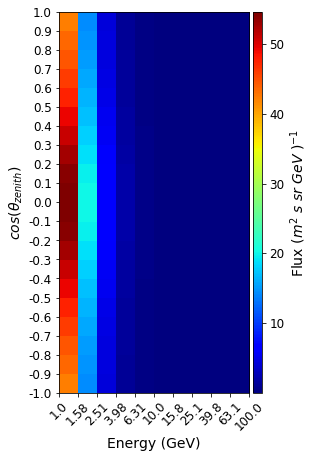

In [291]:
binned_cropped_matrix, divided = bin_matrix(flux_SIBYLL23C_H3a, make_flux_plot = True, divide = False) #, savefig = 'flux_SIBYLL23C_H3a')

In [268]:
np.savetxt('MCEq_2dflux', binned_cropped_matrix, delimiter=',')

In [303]:
# Create a 2D histogram of the total rate of neutrinos in one year from combining
# the flux histogram and the effective area values/histogram. 

A_eff_cc = np.genfromtxt('numu_cc.csv', skip_header = 1, delimiter =',')[:,2]
A_eff_nc = np.genfromtxt('numu_nc.csv', skip_header = 1, delimiter =',')[:,2]

In [300]:
def rate_plot(matrix, make_plot = True, divided = False, title = None, savefig = None):
    # Multiplying effective area with flux
    rate_cc = matrix.copy()
    rate_nc = matrix.copy()

    for i in range(len(A_eff_cc)):
        rate_cc[:, i] *= A_eff_cc[i]
        rate_nc[:, i] *= A_eff_nc[i]
        
    # Multiply by sr
    rate_cc *= 4*np.pi/20
    rate_nc *= 4*np.pi/20

    rate_year_cc = rate_cc * 31_556_926    # seconds in a year
    rate_year_nc = rate_nc * 31_556_926
    
    # Multiply by energy binwidth
    for i in range(len(rate_year_cc[0])):
        rate_year_nc[:, i] *= energy_binwidths[i]
        rate_year_cc[:, i] *= energy_binwidths[i]
    
    if divided == True:
        cbar_label = r' Total rate of $\nu_{\mu} per year  $GeV^{-1}$'
        
    elif divided == False:
        cbar_label = r' Total rate of $\nu_{\mu}$ per year'
    
    if make_plot == True:
        fig, ax = plt.subplots(1, 2, figsize=(14, 9))
        ax.ravel()

        im_0 = ax[0].imshow(rate_year_cc, cmap='jet') 
        im_1 = ax[1].imshow(rate_year_nc, cmap='jet') 

        for i in range(2):
            ax[i].set_xlabel('Energy (GeV)', fontsize = 12)
            ax[i].set_ylabel(r'$cos(\theta_{zenith})$', fontsize = 12)
            ax[i].set_xticks(xticks)
            ax[i].set_xticklabels(energy_strings, rotation = 45)
            ax[i].set_yticks(yticks)
            ax[i].set_yticklabels(ylabels)

        divider_0 = make_axes_locatable(ax[0])
        divider_1 = make_axes_locatable(ax[1])
        cax_0 = divider_0.append_axes("right", size="5%", pad=0.05)
        cax_1 = divider_1.append_axes("right", size="5%", pad=0.05)
        cbar_0 = plt.colorbar(im_0, cax=cax_0)
        cbar_1 = plt.colorbar(im_1, cax=cax_1)
        cbar_0.set_label(cbar_label, fontsize = 12) 
        cbar_1.set_label(cbar_label, fontsize = 12) 
        
        if title != None:
            plt.suptitle(title, fontsize=20)

        ax[0].set_title('cc')
        ax[1].set_title('nc');
        
        if savefig != None:
            fig.savefig(savefig)
    
    return rate_year_cc, rate_year_nc

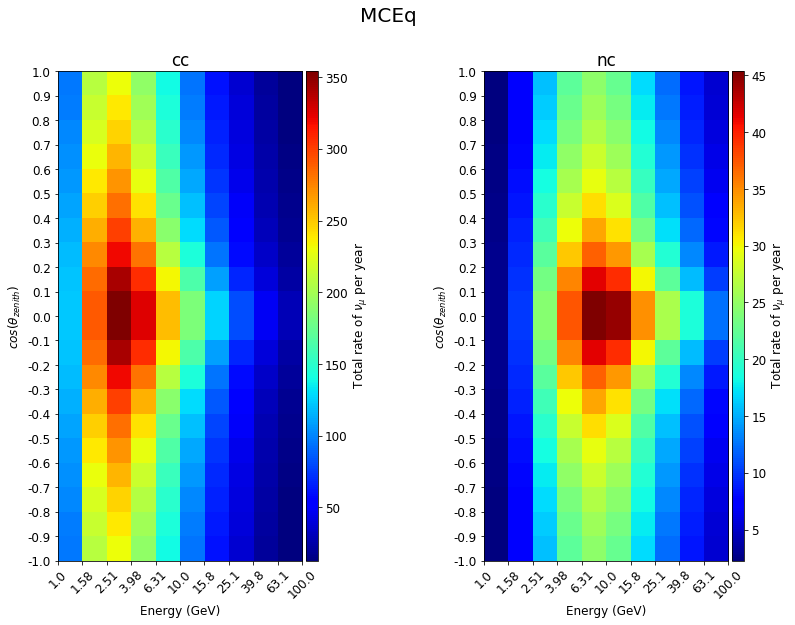

In [304]:
rate_year_cc, rate_year_nc = rate_plot(binned_cropped_matrix, divided = divided, title='MCEq') #, savefig = 'MCEq_1d_total_rate_per_year')


In [267]:
np.savetxt('total_rate_year_cc' , rate_year_cc, delimiter =',')
np.savetxt('total_rate_year_nc' , rate_year_nc, delimiter =',')

### Change of primary model

In [ ]:
# Hadronic interaction models
# SIBYLL23c
# SIBYLL23
# SIBYLL21
# EPOS-LHC
# QGSJet-II-04
# QGSJet-II-03
# QGSJet-01c
# DPMJET-III-3.0.6
# DPMJET-III-19.1
# SIBYLL-2.3c_pp (for proton-proton collisions)

# Cosmic ray fluxes: https://crfluxmodels.readthedocs.io/en/latest/
#pmodels = [
#    (crf.GaisserStanevTilav, "3-gen", "GST 3-gen", "b", "--"),
#    (crf.GaisserStanevTilav, "4-gen", "GST 4-gen", "b", "-"),
#    (crf.CombinedGHandHG, "H3a", "cH3a", "g", "--"),
#    (crf.CombinedGHandHG, "H4a", "cH4a", "g", "-"),
#    (crf.HillasGaisser2012, "H3a", "H3a", "r", "--"),
#    (crf.HillasGaisser2012, "H4a", "H4a", "r", "-"),
#    (crf.PolyGonato, False, "poly-gonato", "m", "-"),
#    (crf.Thunman, None, "TIG", "y", "-"),
#    (crf.ZatsepinSokolskaya, 'default', 'ZS', "c", "-"),
#    (crf.ZatsepinSokolskaya, 'pamela', 'ZSP', "c", "--"),
#    (crf.GaisserHonda, None, 'GH', "0.5", "-"),
    #    (GlobalSplineFit, None, 'GSF', "k", "-"),
#    (crf.GlobalSplineFitBeta, None, 'GSF spl', "k", ":")
#]

In [75]:
flux_GSF = np.zeros((n_theta,121))

for t in range(len(theta_matrix)):
    print(t)
    numu_flux, x_matrix = flux(theta_matrix[t], primary_model = (crf.GlobalSplineFitBeta, None), numu_only = True)
    flux_GSF[t] = numu_flux * 10000

0
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): GlobalSplineFitBeta 
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): GlobalSplineFitBeta 
1
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): GlobalSplineFitBeta 
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): GlobalSplineFitBeta 
2
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): 

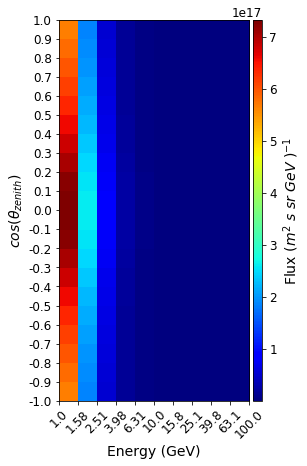

In [312]:
binned_flux_GSF, divide_GSF = bin_matrix(flux_GSF, make_flux_plot = True)
#fig.savefig('MCEq_1d_flux_mag0_divided')

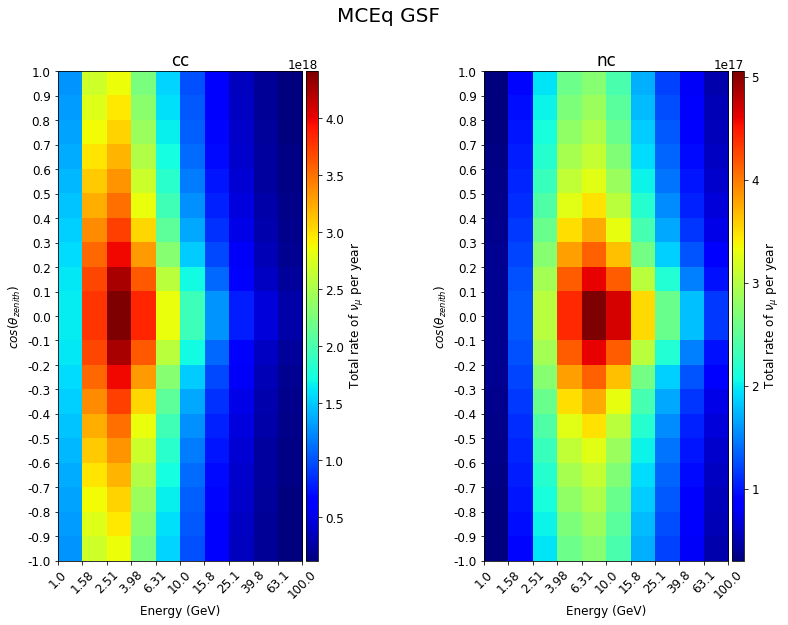

In [318]:
rate_year_cc_GSF, rate_year_nc_GSF = rate_plot(binned_flux_GSF, divided = divide_GSF,  
                                               title = 'MCEq GSF') #, savefig = 'GSF_total_rate')

### Change of interaction model

In [129]:
flux_EPOSLHC = np.zeros((n_theta,121))

for t in range(len(theta_matrix)):
    print(t)
    numu_flux, x_matrix = flux(theta_matrix[t], int_model = 'EPOS-LHC', numu_only = True)
    flux_EPOSLHC[t] = numu_flux * 10000

0
MCEqRun::set_interaction_model(): EPOSLHC
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): EPOSLHC
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
1
MCEqRun::set_interaction_model(): EPOSLHC
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): EPOSLHC
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
2
MCEqRun::set_interaction_model(): EPOSLHC
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): Hillas

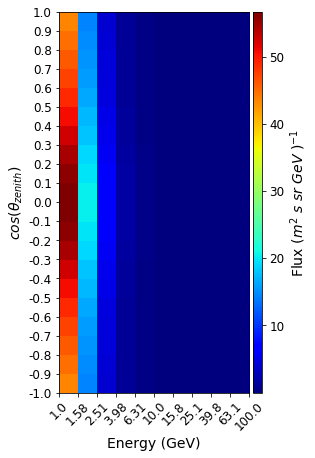

In [315]:
binned_flux_EPOSLHC, divide_EPOSLHC = bin_matrix(flux_EPOSLHC, make_flux_plot = True) #savefig = 

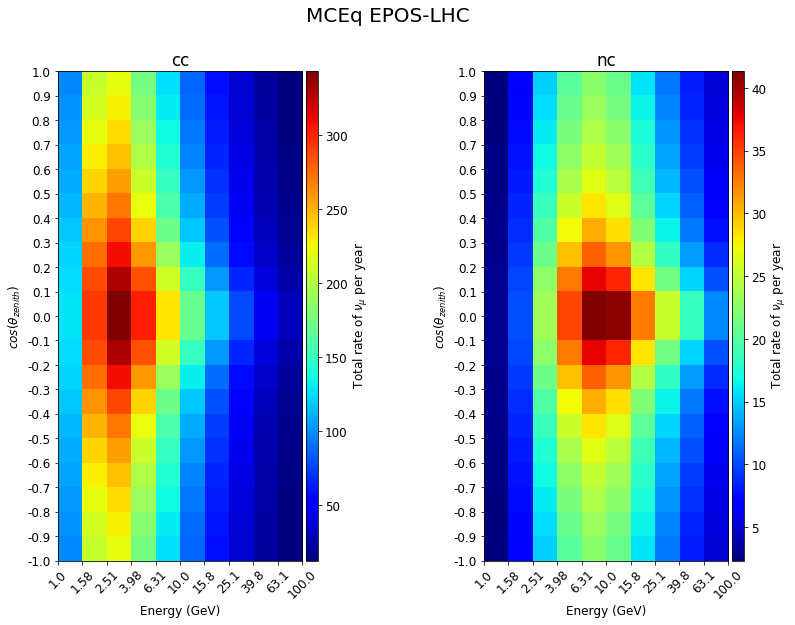

In [317]:
rate_year_cc_EPOSLHC, rate_year_nc_EPOSLHC = rate_plot(binned_flux_EPOSLHC, divided = divide_EPOSLHC, 
                                                       title = 'MCEq EPOS-LHC') #, savefig = 'EPOS-LHC_total_rate')